In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Banking.csv')

# Show all column names for reference
print(df.columns.tolist())

# Preview first few rows
df.head()


['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank', 'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure', 'Loyalty Classification', 'Estimated Income', 'Superannuation Savings', 'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending', 'Properties Owned', 'Risk Weighting', 'BRId', 'GenderId', 'IAId']


,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [2]:
# Choose your primary numeric financial features for clustering
numeric_cols = [
    'Age',
    'Estimated Income',
    'Credit Card Balance',
    'Bank Loans',
    'Bank Deposits',
    'Checking Accounts',
    'Saving Accounts'
]


In [3]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure numeric dtype
    df[col] = df[col].fillna(df[col].median())


In [4]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    cap_value = df[col].quantile(0.99)
    df.loc[df[col] > upper_bound, col] = cap_value


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
df_scaled.head()


,Age,Estimated Income,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts
0,-1.362100,-0.860009,-1.075445,0.403279,1.132899,0.914513,1.381797
1,-1.412474,1.067215,-0.368725,1.484431,-0.071630,-0.328706,0.380871
2,-1.210978,-0.010299,0.553128,1.007902,0.487474,1.077541,-0.158579
3,-0.556114,1.669098,0.408087,-1.029257,0.508525,3.344403,-0.038060
4,-0.253869,-0.362795,0.238415,0.998250,-0.290897,0.392849,-0.443211


In [6]:
import numpy as np

corr_matrix = df_scaled.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
selected_features = [col for col in numeric_cols if col not in to_drop]
df_selected = df_scaled[selected_features]
print("Selected features:", selected_features)
df_selected.head()


Selected features: ['Age', 'Estimated Income', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts']


,Age,Estimated Income,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts
0,-1.362100,-0.860009,-1.075445,0.403279,1.132899,0.914513,1.381797
1,-1.412474,1.067215,-0.368725,1.484431,-0.071630,-0.328706,0.380871
2,-1.210978,-0.010299,0.553128,1.007902,0.487474,1.077541,-0.158579
3,-0.556114,1.669098,0.408087,-1.029257,0.508525,3.344403,-0.038060
4,-0.253869,-0.362795,0.238415,0.998250,-0.290897,0.392849,-0.443211


In [7]:
# Show as screenshot in your report under Feature Preparation Results
df_selected.head(10)


,Age,Estimated Income,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts
0,-1.362100,-0.860009,-1.075445,0.403279,1.132899,0.914513,1.381797
1,-1.412474,1.067215,-0.368725,1.484431,-0.071630,-0.328706,0.380871
2,-1.210978,-0.010299,0.553128,1.007902,0.487474,1.077541,-0.158579
3,-0.556114,1.669098,0.408087,-1.029257,0.508525,3.344403,-0.038060
4,-0.253869,-0.362795,0.238415,0.998250,-0.290897,0.392849,-0.443211
5,-1.412474,-0.474094,0.784331,0.022011,0.878170,1.386448,-0.024247
6,-0.253869,-1.022206,-0.885895,-0.837432,-0.927983,-0.890113,-0.838374
7,1.358104,-0.952205,0.556254,1.200327,-0.762809,-0.912375,-0.753885
8,0.803988,-0.747991,-1.237305,0.462766,0.785553,-0.000324,0.132800
9,-0.001998,-0.950016,0.660041,-1.163024,-0.534180,-0.720815,-0.490770


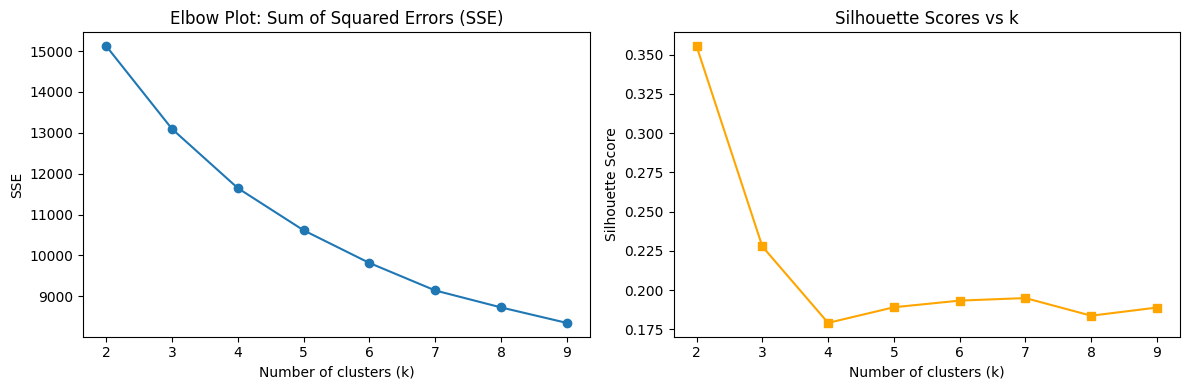

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
sil = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_selected)
    sse.append(kmeans.inertia_)
    sil.append(silhouette_score(df_selected, labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K, sse, marker='o')
plt.title('Elbow Plot: Sum of Squared Errors (SSE)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(K, sil, marker='s', color='orange')
plt.title('Silhouette Scores vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


In [9]:
kmeans_final = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans_final.fit_predict(df_selected)
centroids = scaler.inverse_transform(kmeans_final.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=selected_features)
centroid_df['Risk Label'] = ['Low Risk', 'Medium Risk', 'High Risk']
centroid_df = centroid_df[['Risk Label'] + selected_features]
centroid_df


,Risk Label,Age,Estimated Income,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts
0,Low Risk,51.828452,111970.026169,1954.068416,365451.638273,3.555441e+05,194386.001506,139460.469307
1,Medium Risk,49.851309,248667.670283,4564.463261,861740.025751,7.180303e+05,352473.674147,245130.199236
2,High Risk,50.543011,237742.479432,5151.964609,917072.445606,2.135853e+06,869560.306499,716681.659247


In [10]:
import numpy as np

cluster_summary = df.copy()
cluster_summary['Cluster'] = labels
summary_table = cluster_summary.groupby('Cluster')[selected_features].agg(['mean', 'std', 'min', 'max'])
summary_table


Age                    Estimated Income                 \
              mean        std min max             mean            std   
Cluster                                                                 
0        51.828452  19.995540  17  85    111970.026169   67634.851287   
1        49.851309  19.757144  17  85    248667.670283  109104.322878   
2        50.543011  19.347044  17  85    237742.479432  114846.118076   

                               Credit Card Balance               ...  \
              min          max                mean          std  ...   
Cluster                                                          ...   
0        15919.48  446342.2300         1954.068416  1367.458658  ...   
1        38281.04  480745.8600         4564.463261  2535.926381  ...   
2        41258.88  475538.9211         5151.964609  3206.598634  ...   

        Bank Deposits               Checking Accounts                 \
                  min           max              mean            std   
Cluster                                                                
0                0.00  1.680282e+06     194386.001506  146795.985532   
1                0.00  1.721389e+06     352473.674147  206773.414069   
2           635861.07  2.999042e+06     869560.306499  386006.263675   

                                 Saving Accounts                            \
               min           max            mean            std        min   
Cluster                                                                      
0             0.00  8.759407e+05   139460.469307  117823.559837       0.00   
1             0.00  9.020610e+05   245130.199236  155211.320519       0.00   
2        206533.36  1.334795e+06   716681.659247  398968.789378  104684.34   

                     
                max  
Cluster              
0         635764.74  
1         668070.31  
2        1166963.15  

[3 rows x 28 columns]

In [11]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(df_selected, labels)
print("Davies-Bouldin Score:", db_score)


Davies-Bouldin Score: 1.727841989526696


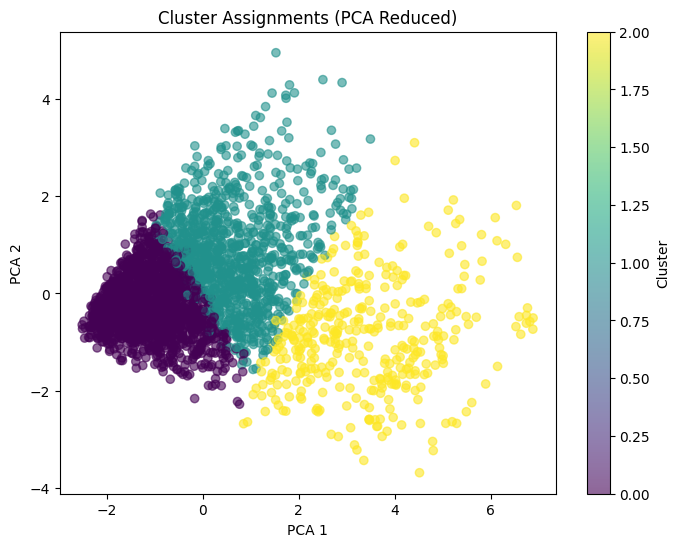

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_selected)
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Cluster Assignments (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()
